In [3]:
import numpy as np
import pandas as pd

# Function to calculate the mean (centroid) for each class
def calculate_mean(class_data):
    return np.mean(class_data, axis=0)

# Function to calculate the spread (standard deviation) for each class
def calculate_spread(class_data):
    return np.std(class_data, axis=0)

# Function to calculate the distance between two centroids (Euclidean distance)
def calculate_distance(centroid1, centroid2):
    return np.linalg.norm(centroid1 - centroid2)

# Function to convert text to a simple character-level feature vector
def text_to_vector(text, max_length):
    # Convert each character to its ASCII value
    vec = [ord(char) for char in text]
    # Pad the vector with zeros if it's shorter than max_length
    vec = vec + [0] * (max_length - len(vec))
    return np.array(vec)

# Load the dataset
file_path = (r"C:\Users\varshita\Downloads\hindi.xlsx")
data = pd.read_excel(file_path)

# Determine the maximum length of the text in both columns
max_length = max(data['Wow!'].apply(len).max(), data['वाह!'].apply(len).max())

# Convert English and Hindi phrases to feature vectors, with padding
english_features = data['Wow!'].apply(lambda x: text_to_vector(x, max_length))
hindi_features = data['वाह!'].apply(lambda x: text_to_vector(x, max_length))

# Convert series of arrays into 2D numpy arrays for computation
english_matrix = np.stack(english_features.values)
hindi_matrix = np.stack(hindi_features.values)

# Calculate mean for each class (centroid)
mean_english = calculate_mean(english_matrix)
mean_hindi = calculate_mean(hindi_matrix)

# Calculate spread (standard deviation) for each class
spread_english = calculate_spread(english_matrix)
spread_hindi = calculate_spread(hindi_matrix)

# Calculate distance between mean vectors between classes
distance = calculate_distance(mean_english, mean_hindi)

# Output the results
print("Mean of English features:", mean_english)
print("Standard deviation of English features:", spread_english)
print()
print("Mean of Hindi features:", mean_hindi)
print("Standard deviation of Hindi features:", spread_hindi)
print()
print("Distance between the centroids of English and Hindi features:", distance)


Mean of English features: [7.73519608e+01 9.01120915e+01 8.98264706e+01 8.47026144e+01
 9.31294118e+01 9.49039216e+01 9.13594771e+01 9.41183007e+01
 9.14503268e+01 8.99437908e+01 9.15480392e+01 8.93937908e+01
 8.84209150e+01 8.88856209e+01 8.80522876e+01 8.49336601e+01
 8.51081699e+01 8.23529412e+01 7.96643791e+01 7.75183007e+01
 7.53382353e+01 7.12790850e+01 6.82754902e+01 6.57944444e+01
 6.34434641e+01 5.92777778e+01 5.56787582e+01 5.16748366e+01
 4.83758170e+01 4.46777778e+01 4.20843137e+01 3.85124183e+01
 3.52921569e+01 3.29415033e+01 2.97977124e+01 2.60552288e+01
 2.43562092e+01 2.22656863e+01 1.99748366e+01 1.86539216e+01
 1.67970588e+01 1.49356209e+01 1.34248366e+01 1.20238562e+01
 1.07794118e+01 1.01915033e+01 8.52516340e+00 7.53333333e+00
 6.63267974e+00 5.74738562e+00 5.34477124e+00 4.98562092e+00
 4.46862745e+00 3.92124183e+00 3.29803922e+00 3.11111111e+00
 2.51633987e+00 2.26732026e+00 1.85718954e+00 1.70980392e+00
 1.55686275e+00 1.21633987e+00 1.10522876e+00 1.00882353e+0

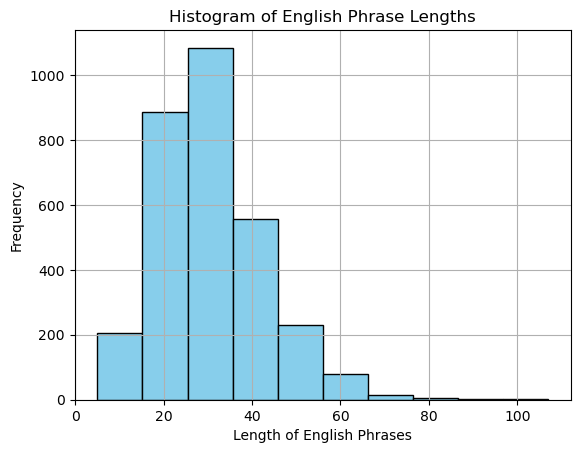

Mean length of English phrases: 30.63986928104575
Variance of English phrases: 136.62912939467736


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate the histogram data
def calculate_histogram(data, bins):
    return np.histogram(data, bins=bins)

# Function to plot the histogram
def plot_histogram(data, bins, xlabel, ylabel, title):
    plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Function to calculate mean and variance
def calculate_mean_and_variance(data):
    mean = np.mean(data)
    variance = np.var(data)
    return mean, variance

# Load the dataset
file_path = (r"C:\Users\varshita\Downloads\hindi.xlsx")
data = pd.read_excel(file_path)

# Feature selection: Here, we'll use the length of the English phrases as the feature
english_lengths = data['Wow!'].apply(len)

# Define the number of bins for the histogram
bins = 10

# Calculate the histogram data
hist, bin_edges = calculate_histogram(english_lengths, bins)

# Plot the histogram
plot_histogram(english_lengths, bins, 'Length of English Phrases', 'Frequency', 'Histogram of English Phrase Lengths')

# Calculate mean and variance
mean_length, variance_length = calculate_mean_and_variance(english_lengths)

# Output the results
print("Mean length of English phrases:", mean_length)
print("Variance of English phrases:", variance_length)


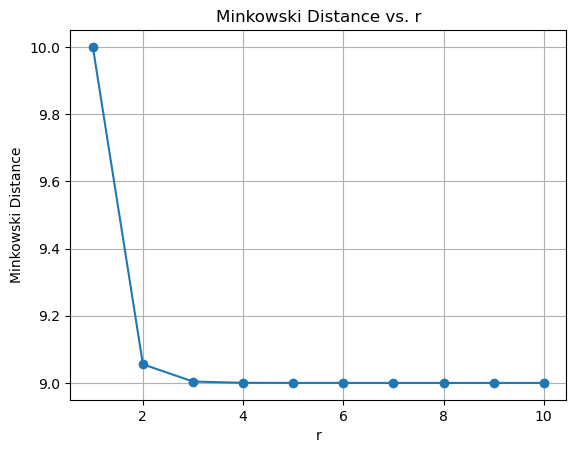

Selected feature vector 1: [25 22]
Selected feature vector 2: [16 21]
Minkowski distances for r from 1 to 10: [10.0, 9.055385138137417, 9.0041133460937, 9.000342915929068, 9.000030482951564, 9.000002822512421, 9.000000268810892, 9.000000026134394, 9.000000002581174, 9.000000000258119]


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate Minkowski distance
def calculate_minkowski_distance(vec1, vec2, r):
    return np.linalg.norm(vec1 - vec2, ord=r)

# Function to plot the Minkowski distances for different r values
def plot_minkowski_distances(r_values, distances):
    plt.plot(r_values, distances, marker='o', linestyle='-')
    plt.xlabel('r')
    plt.ylabel('Minkowski Distance')
    plt.title('Minkowski Distance vs. r')
    plt.grid(True)
    plt.show()

# Load the dataset
file_path = (r"C:\Users\varshita\Downloads\hindi.xlsx")
data = pd.read_excel(file_path)

# Feature selection: Lengths of English and Hindi phrases
english_lengths = data['Wow!'].apply(len)
hindi_lengths = data['वाह!'].apply(len)

# Randomly select two feature vectors (here we'll use the lengths of phrases as the feature vectors)
np.random.seed(1)
index1 = np.random.randint(0, len(english_lengths))
index2 = np.random.randint(0, len(english_lengths))

features1 = np.array([english_lengths.iloc[index1], hindi_lengths.iloc[index1]])
features2 = np.array([english_lengths.iloc[index2], hindi_lengths.iloc[index2]])

# Calculate Minkowski distance for r from 1 to 10
r_values = range(1, 11)
distances = []
for r in r_values:
    distance = calculate_minkowski_distance(features1, features2, r)
    distances.append(distance)

# Plot the Minkowski distances
plot_minkowski_distances(r_values, distances)

# Output the results for observation
print("Selected feature vector 1:", features1)
print("Selected feature vector 2:", features2)
print("Minkowski distances for r from 1 to 10:", distances)


In [7]:
from sklearn.model_selection import train_test_split

# Function to define features (X) and target variable (y)
def define_features_and_target(data):
    # Here, we use English phrases as features (X) and Hindi phrases as target (y)
    X = data['Wow!']  # English phrases
    y = data['वाह!']  # Hindi phrases
    return X, y

# Function to split the dataset into training and test sets
def split_dataset(X, y, test_size=0.3, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Load the dataset
file_path = (r"C:\Users\varshita\Downloads\hindi.xlsx")
data = pd.read_excel(file_path)

# Define features (X) and target variable (y)
X, y = define_features_and_target(data)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = split_dataset(X, y)

# Print the shapes of the training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (2142,)
Shape of X_test: (918,)
Shape of y_train: (2142,)
Shape of y_test: (918,)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Function to convert text data to numerical format (e.g., using Label Encoding)
def encode_text_data(X, y):
    le_X = LabelEncoder()
    le_y = LabelEncoder()
    X_encoded = le_X.fit_transform(X)
    y_encoded = le_y.fit_transform(y)
    return X_encoded.reshape(-1, 1), y_encoded, le_X, le_y

# Function to train a kNN classifier
def train_knn_classifier(X_train, y_train, k=3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

# Load the dataset
file_path = (r"C:\Users\varshita\Downloads\hindi.xlsx")
data = pd.read_excel(file_path)

# Define features (X) and target variable (y)
X = data['Wow!']  # English phrases
y = data['वाह!']  # Hindi phrases

# Encode text data to numerical format
X_encoded, y_encoded, le_X, le_y = encode_text_data(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Train the kNN classifier with k=3
knn = train_knn_classifier(X_train, y_train, k=3)

# Print the training results
print("kNN classifier trained successfully.")
print("Classes in target variable:", le_y.classes_)


kNN classifier trained successfully.
Classes in target variable: ['A B से पाँचगुना लम्बा है।' 'अंग्रेज़ी पढ़ाना उसका पेशा है।'
 'अंग्रेज़ी बोलते समय गलतियों का डर नहीं होना चाहिए।' ...
 'होमवर्क किया क्या?'
 '१६०० की शतक में चाय को भारत से यूरोप में लाया गया था।'
 '१९५१ में सिस्टर टेरेसा को कलकत्ता भेजा गया था, जो उस समय भारत का सबसे बड़ा शहर था।']


In [11]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Function to convert text data to numerical format (e.g., using Label Encoding)
def encode_text_data(X, y):
    le_X = LabelEncoder()
    le_y = LabelEncoder()
    X_encoded = le_X.fit_transform(X)
    y_encoded = le_y.fit_transform(y)
    return X_encoded.reshape(-1, 1), y_encoded, le_X, le_y

# Function to train a kNN classifier
def train_knn_classifier(X_train, y_train, k=3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

# Load the dataset
file_path = (r"C:\Users\varshita\Downloads\hindi.xlsx")
data = pd.read_excel(file_path)

# Define features (X) and target variable (y)
X = data['Wow!']  # English phrases
y = data['वाह!']  # Hindi phrases

# Encode text data to numerical format
X_encoded, y_encoded, le_X, le_y = encode_text_data(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Train the kNN classifier with k=3
knn = train_knn_classifier(X_train, y_train, k=3)

# Test the accuracy of the kNN classifier using the test set
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.004901960784313725


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Load the dataset
file_path = (r"C:\Users\varshita\Downloads\hindi.xlsx")
data = pd.read_excel(file_path)

# For the sake of this example, let's assume X is the English phrases and y is the Hindi translations
# (You should modify this according to your actual features and labels)
X = data['Wow!']  # This should be your feature column(s)
y = data['वाह!']  # This should be your label column

# Convert the data to a suitable format if necessary
# For example, if using text, you'd need to vectorize it first (this is a simple placeholder)
X = X.apply(lambda x: len(x))  # Example transformation: Convert each phrase to its length
y = y.apply(lambda x: len(x))  # Same for labels just for this placeholder example

# Split the dataset into training and test sets
def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Train the classifier
def train_classifier(X_train, y_train, n_neighbors=3):
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    neigh.fit(np.array(X_train).reshape(-1, 1), y_train)
    return neigh

# Predict the class of a test vector
def predict_class(neigh, test_vector):
    predicted_class = neigh.predict(np.array(test_vector).reshape(1, -1))
    return predicted_class[0]

# Main function to execute the prediction
def main(X, y, test_vect_idx=0):
    # Split the data
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Train the classifier
    neigh = train_classifier(X_train, y_train)

    # Choose a test vector (e.g., the first vector in the test set)
    test_vector = [X_test.iloc[test_vect_idx]] if isinstance(X_test, pd.Series) else [X_test[test_vect_idx]]

    # Perform classification for the chosen test vector
    predicted_class = predict_class(neigh, test_vector)

    print("Predicted class label for the test vector:", predicted_class)

# Execute the main function
main(X, y)


Predicted class label for the test vector: 26


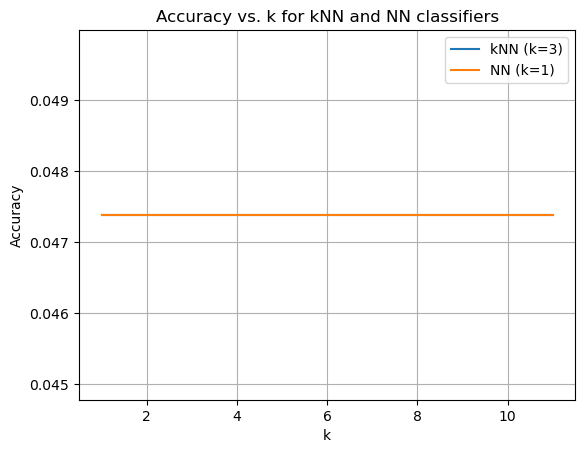

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the dataset
file_path = (r"C:\Users\varshita\Downloads\hindi.xlsx")
data = pd.read_excel(file_path)

# For the sake of this example, let's assume X is the English phrases and y is the Hindi translations
# You should modify this according to your actual features and labels
X = data['Wow!']  # Replace this with the actual feature(s) column
y = data['वाह!']  # Replace this with the actual label column

# Convert the data to a suitable format if necessary
# Example transformation: Convert each phrase to its length (placeholder)
X = X.apply(lambda x: len(x))
y = y.apply(lambda x: len(x))

# Split the dataset into training and test sets
def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Function to train and evaluate the kNN and NN classifiers
def evaluate_knn_nn(X_train, y_train, X_test, y_test):
    # Lists to store accuracy values
    accuracies_k3 = []
    accuracies_k1 = []
    k_values = range(1, 12)
    
    # Vary k from 1 to 11
    for k in k_values:
        # Train kNN classifier with k=3
        neigh_k3 = KNeighborsClassifier(n_neighbors=3)
        neigh_k3.fit(np.array(X_train).reshape(-1, 1), y_train)
        accuracy_k3 = neigh_k3.score(np.array(X_test).reshape(-1, 1), y_test)
        accuracies_k3.append(accuracy_k3)

        # Train NN classifier with k=1
        neigh_k1 = KNeighborsClassifier(n_neighbors=1)
        neigh_k1.fit(np.array(X_train).reshape(-1, 1), y_train)
        accuracy_k1 = neigh_k1.score(np.array(X_test).reshape(-1, 1), y_test)
        accuracies_k1.append(accuracy_k1)

    return k_values, accuracies_k3, accuracies_k1

# Function to plot the accuracies
def plot_accuracies(k_values, accuracies_k3, accuracies_k1):
    plt.plot(k_values, accuracies_k3, label='kNN (k=3)')
    plt.plot(k_values, accuracies_k1, label='NN (k=1)')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. k for kNN and NN classifiers')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to execute the evaluation and plotting
def main(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Evaluate the classifiers
    k_values, accuracies_k3, accuracies_k1 = evaluate_knn_nn(X_train, y_train, X_test, y_test)

    # Plot the results
    plot_accuracies(k_values, accuracies_k3, accuracies_k1)

# Execute the main function
main(X, y)


Confusion Matrix (Training Data):
 [[1 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Confusion Matrix (Test Data):
 [[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


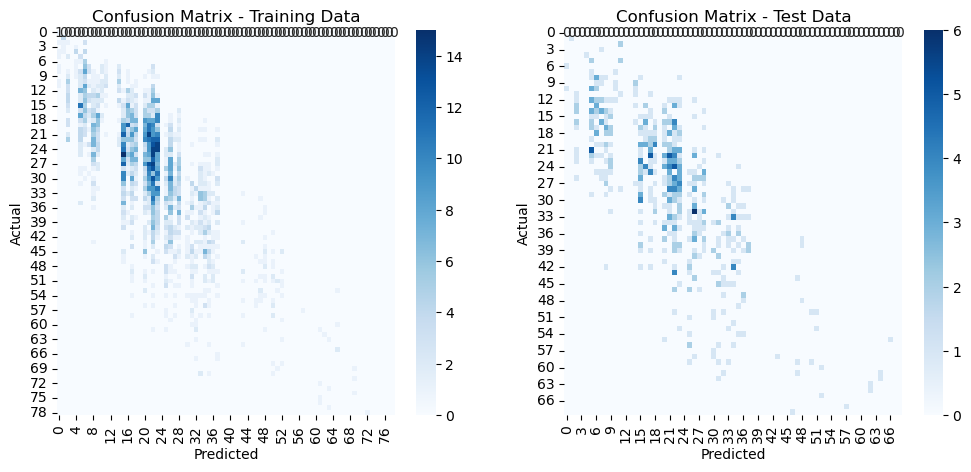

Classification Report (Training Data):
               precision    recall  f1-score   support

           4       0.12      1.00      0.22         1
           5       0.57      1.00      0.73         4
           6       0.02      0.17      0.04         6
           7       0.00      0.00      0.00         2
           8       0.44      0.40      0.42        10
           9       0.04      0.50      0.08         6
          10       0.06      0.62      0.10         8
          11       0.11      0.16      0.13        19
          12       0.01      0.04      0.02        28
          13       0.02      0.05      0.03        19
          14       0.12      0.08      0.10        25
          15       0.23      0.09      0.13        32
          16       0.00      0.00      0.00        39
          17       0.00      0.00      0.00        44
          18       0.14      0.08      0.10        50
          19       0.02      0.06      0.03        54
          20       0.07      0.11      0.

C:\Users\varshita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\varshita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\varshita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\varshita\anaconda3\Lib\site-packages\

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = (r"C:\Users\varshita\Downloads\hindi.xlsx")
data = pd.read_excel(file_path)

# For this example, let's assume X is the English phrases and y is the Hindi translations
# You should modify this according to your actual features and labels
X = data['Wow!']  # Replace this with the actual feature(s) column
y = data['वाह!']  # Replace this with the actual label column

# Convert the data to a suitable format if necessary
# Example transformation: Convert each phrase to its length (placeholder)
X = X.apply(lambda x: len(x))
y = y.apply(lambda x: len(x))

# Split the dataset into training and test sets
def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Function to train the kNN classifier
def train_knn(X_train, y_train, n_neighbors=3):
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    neigh.fit(np.array(X_train).reshape(-1, 1), y_train)
    return neigh

# Function to evaluate the model and display metrics
def evaluate_model(neigh, X_train, y_train, X_test, y_test):
    # Predict on training data
    y_train_pred = neigh.predict(np.array(X_train).reshape(-1, 1))
    
    # Predict on test data
    y_test_pred = neigh.predict(np.array(X_test).reshape(-1, 1))

    # Confusion matrix for training data
    cm_train = confusion_matrix(y_train, y_train_pred)
    print("Confusion Matrix (Training Data):\n", cm_train)
    
    # Confusion matrix for test data
    cm_test = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix (Test Data):\n", cm_test)

    # Plot confusion matrices
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix - Training Data")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    plt.subplot(1, 2, 2)
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix - Test Data")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    plt.show()

    # Classification report for training data
    print("Classification Report (Training Data):\n", classification_report(y_train, y_train_pred))

    # Classification report for test data
    print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))

# Main function to execute the evaluation
def main(X, y, n_neighbors=3):
    # Split the data
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Train the kNN classifier
    neigh = train_knn(X_train, y_train, n_neighbors)

    # Evaluate the model on both training and test data
    evaluate_model(neigh, X_train, y_train, X_test, y_test)

# Execute the main function
main(X, y)
